In [215]:
########################################IMPORTS FOR READING IMAGES FROM A FOLDER ########################################
from pathlib import Path
import glob
import pandas as pd
import numpy as np
from PIL import Image
from resizeimage import resizeimage
import matplotlib as mp
import matplotlib.pyplot as plt
import cv2
import os

#######################################################General Imports######################################################
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.initializers import he_uniform
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import pydot
import pydotplus
from pydotplus import graphviz
from IPython.display import Image 
import os
import math
import h5py
import tkinter as tk
from tkinter import ttk
import re

In [145]:
#Importing Cifar Dataset 

In [191]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

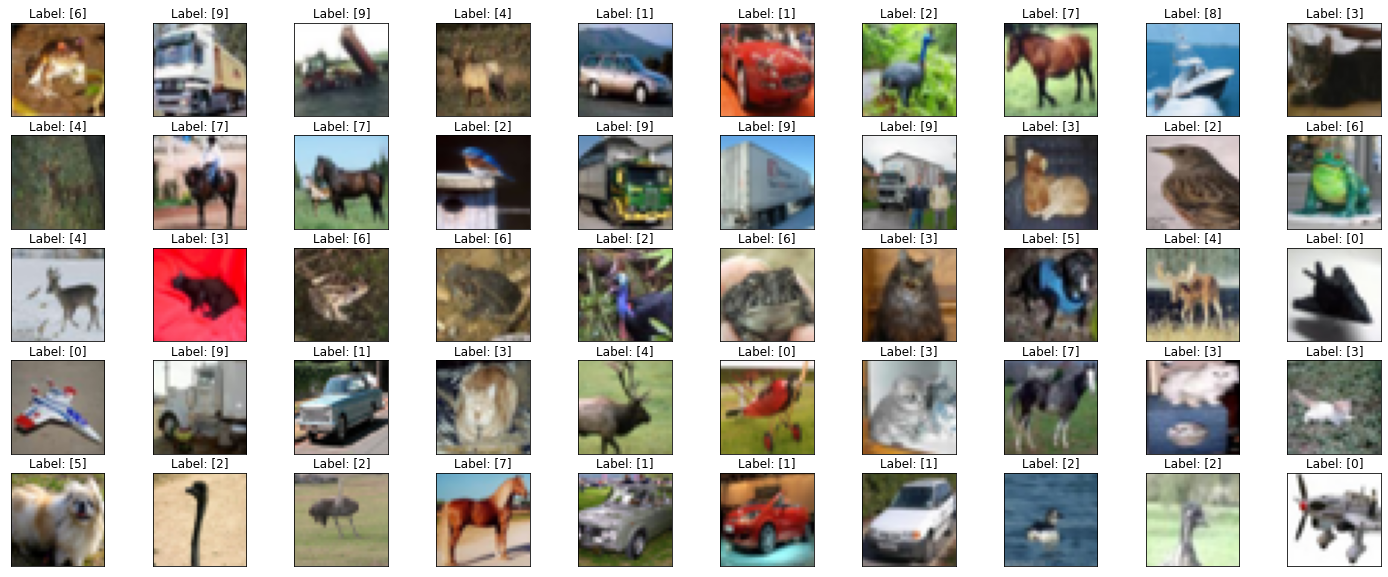

In [31]:
#Vizualizing First 16 Images to know what each label means 
plt.figure(figsize=(25,10))
for i in range(50):
    plt.subplot(5,10,1+i,xticks=[],yticks=[])
    plt.title("Label: {}".format(y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
    i = i + 1

In [9]:
#airplane : 0
#automobile : 1
#bird : 2
#cat : 3
#deer : 4
#dog : 5
#frog : 6
#horse : 7
#ship : 8
#truck : 9

In [192]:
#Splitting the Data and Making it Ready for CCN 
x_train_04 = x_train[y_train.flatten() < 5]
y_train_04 = y_train[y_train.flatten() < 5]
x_test_04  = x_test[y_test.flatten() < 5]
y_test_04  = y_test[y_test.flatten() < 5]

x_train_59 = x_train[y_train.flatten() >= 5]
y_train_59 = y_train[y_train.flatten() >= 5]
x_test_59  = x_test[y_test.flatten() >= 5]
y_test_59  = y_test[y_test.flatten() >= 5]

x_train_04 = x_train_04.reshape(x_train_04.shape[0], x_train_04.shape[1],x_train_04.shape[2],3)
x_test_04 = x_test_04.reshape(x_test_04.shape[0], x_test_04.shape[1],x_test_04.shape[2],3)
x_train_04 = x_train_04.astype('float32')/255
x_test_04 = x_test_04.astype('float32')/255

#One Hot Encolding Class Vectors
y_train_04 = tf.keras.utils.to_categorical(y_train_04.flatten(), num_classes=len(np.unique(y_train_04)))
y_test_04 = tf.keras.utils.to_categorical(y_test_04.flatten(), num_classes= len(np.unique(y_test_04)))

In [193]:
x_train_04.shape

(25000, 32, 32, 3)

In [194]:
x_train_59.shape

(25000, 32, 32, 3)

In [195]:
x_test_04.shape

(5000, 32, 32, 3)

In [196]:
x_test_59.shape

(5000, 32, 32, 3)

In [197]:
y_train_04.shape

(25000, 5)

In [16]:
y_test_04.shape

(5000, 5)

In [17]:
########################################## FIRST MODEL ##################################################################

In [223]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(1024, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])          

In [225]:
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='r8_ext_check1', save_best_only=True, verbose=False)
training = model.fit(x_train_04, y_train_04, batch_size=32, nb_epoch=10, validation_data=(x_test_04, y_test_04),verbose=True, callbacks=[ckpt_callback])


Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 403s 16ms/sample - loss: 0.7273 - acc: 0.7265 - val_loss: 0.6660 - val_acc: 0.7450
Epoch 2/10
25000/25000 [==============================] - 395s 16ms/sample - loss: 0.5356 - acc: 0.7988 - val_loss: 0.6746 - val_acc: 0.7558
Epoch 3/10
25000/25000 [==============================] - 407s 16ms/sample - loss: 0.4758 - acc: 0.8199 - val_loss: 0.6886 - val_acc: 0.7642
Epoch 4/10
25000/25000 [==============================] - 425s 17ms/sample - loss: 0.4265 - acc: 0.8375 - val_loss: 0.7033 - val_acc: 0.7510
Epoch 5/10
25000/25000 [==============================] - 395s 16ms/sample - loss: 0.3918 - acc: 0.8519 - val_loss: 0.7310 - val_acc: 0.7582
Epoch 6/10
25000/25000 [==============================] - 392s 16ms/sample - loss: 0.3614 - acc: 0.8629 - val_loss: 0.8011 - val_acc: 0.7586
Epoch 7/10
25000/25000 [==============================] - 395s 16ms/sample - loss: 0.3219 - acc: 0.8763 -

In [226]:
#CheckPoints Saved as - "r8_ext_check1"
#model.save('80_model')

In [175]:
####################################### END OF FIRST MODEL  ###############################################################

In [ ]:
# For Sure the Model Should be Improved

In [ ]:
#As Image size if small , too many convolution layers will reduce the image size Drastically ....
#So I tried  1) Reducing the stride of pooling layer to 1 (but that dint work well)
#2) Using padding for the Convolution layer ...(This worked better)

In [ ]:
#To Improve the Accuracy of the Model I tried  1) More stacked Convolution in the 1st Layer and reducing Convolutions
#as well as filters in the 2nd and Upcoming Layers(but that dint work great)   2) Checking out how VGG16 did the trick 
# In VGG16 1st layer has less convolutions and 2nd and Higher Layers has More Stacked Convolutions ...So Here I replicated
#the Same ............

In [ ]:
#If we HAVE MORE TIME AND COMPUTATIONS POWER .....SURELY THE VALIDATION ACCURACY CAN BE TAKE CLOSE TO 85 or 86.........

In [ ]:
#3. Build a sequential neural network model which can classify the classes 0 to 4 of 
#CIFAR10 dataset with at least 80% accuracy on test data

In [176]:
######################################### SECOND MODEL  ##################################################################

In [33]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same',input_shape=(32,32,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
model.add(layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])          

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 8, 512)         1180160   
__________

In [35]:
datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='r8_ext_check2', save_best_only=True, verbose=False)
#training = model.fit(x_train_04, y_train_04, batch_size=32, nb_epoch=10, validation_data=(x_test_04, y_test_04),verbose=True, callbacks=[ckpt_callback])
training = model.fit_generator(datagen.flow(x_train_04, y_train_04, batch_size=32),epochs=12,validation_data=(x_test_04, y_test_04), callbacks=[ckpt_callback])

Epoch 1/12
782/782 [==============================] - 762s 974ms/step - loss: 1.3956 - acc: 0.3679 - val_loss: 1.0310 - val_acc: 0.5706
Epoch 2/12
782/782 [==============================] - 781s 999ms/step - loss: 1.0356 - acc: 0.5695 - val_loss: 0.9072 - val_acc: 0.6188
Epoch 3/12
782/782 [==============================] - 774s 990ms/step - loss: 0.9218 - acc: 0.6295 - val_loss: 0.7900 - val_acc: 0.6812
Epoch 4/12
782/782 [==============================] - 778s 995ms/step - loss: 0.8494 - acc: 0.6656 - val_loss: 0.7682 - val_acc: 0.6924
Epoch 5/12
782/782 [==============================] - 773s 988ms/step - loss: 0.7986 - acc: 0.6894 - val_loss: 0.7539 - val_acc: 0.7070
Epoch 6/12
782/782 [==============================] - 776s 992ms/step - loss: 0.7638 - acc: 0.7043 - val_loss: 0.6653 - val_acc: 0.7328
Epoch 7/12
782/782 [==============================] - 776s 993ms/step - loss: 0.7248 - acc: 0.7236 - val_loss: 0.6411 - val_acc: 0.7536
Epoch 8/12
782/782 [============================

In [36]:
#Here I trained only for 12 epochs....Looks like If I run more Epochs , I can get validation accuracy of 80
#So Using the same model and running Further 5 epochs .....Note: I am using same checkpoints 

In [38]:
training = model.fit_generator(datagen.flow(x_train_04, y_train_04, batch_size=32),epochs=5,validation_data=(x_test_04, y_test_04), callbacks=[ckpt_callback])

Epoch 1/5
782/782 [==============================] - 835s 1s/step - loss: 0.6238 - acc: 0.7657 - val_loss: 0.5759 - val_acc: 0.7770
Epoch 2/5
782/782 [==============================] - 788s 1s/step - loss: 0.6079 - acc: 0.7685 - val_loss: 0.5311 - val_acc: 0.8042
Epoch 3/5
782/782 [==============================] - 781s 998ms/step - loss: 0.5919 - acc: 0.7768 - val_loss: 0.5116 - val_acc: 0.8102
Epoch 4/5
782/782 [==============================] - 785s 1s/step - loss: 0.5783 - acc: 0.7832 - val_loss: 0.5357 - val_acc: 0.7978
Epoch 5/5
782/782 [==============================] - 798s 1s/step - loss: 0.5632 - acc: 0.7904 - val_loss: 0.6532 - val_acc: 0.7830


In [39]:
model.load_weights('r8_ext_check2')

In [40]:
model.evaluate(x_test_04, y_test_04)

5000/5000 [==============================] - 61s 12ms/sample - loss: 0.5088 - acc: 0.8102


[0.5087652111053467, 0.8102]

In [41]:
#Saving the Best Model
model.save('r8_ext_BestModel_81')

In [ ]:
############################################################################################################################

In [ ]:
################### THE MODE GIVES   TRAINING ACCURAY : 77   and  TESTING ACCUARY : 81  ####################################

In [ ]:
############################################################################################################################

In [ ]:
############################################# STARTING TRANSFER LEARNING #################################################

In [127]:
trans_model = tf.keras.models.load_model('r8_ext_BestModel_81')

In [128]:
trans_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 8, 512)         1180160   
__________

In [129]:
#All Layer are Trainable by default
for layer in trans_model.layers:
    print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [130]:
#Finding names of all Layers
for layer in trans_model.layers:
    print(layer.name)

conv2d_31
max_pooling2d_22
dropout
conv2d_32
max_pooling2d_23
dropout_1
conv2d_33
conv2d_34
conv2d_35
max_pooling2d_24
dropout_2
flatten_5
dense_17
dense_18
dense_19
dense_20


In [131]:
#Lets Freeze the the Convolution Layer as we have all names ...easy to iterate and avoid those having dense and freeze all
for layer in trans_model.layers:
    if 'dense' not in layer.name:
        layer.trainable = False

In [132]:
#Just to verify that only the last 4 layers(i.e dense) are True for trainable ......
for layer in trans_model.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [202]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train_59 = x_train[y_train.flatten() >= 5]
y_train_59 = y_train[y_train.flatten() >= 5]
x_test_59  = x_test[y_test.flatten() >= 5]
y_test_59  = y_test[y_test.flatten() >= 5]

#To make it work with keras.to_categorical ..index should start from zero
y_train_59 = y_train_59 - 5
y_test_59 = y_test_59 - 5
#This reshape is not necessary but Just for precaustion
x_train_59 = x_train_59.reshape(x_train_59.shape[0], x_train_59.shape[1],x_train_59.shape[2],3)
x_test_59 = x_test_04.reshape(x_test_59.shape[0], x_test_59.shape[1],x_test_59.shape[2],3)
########
x_train_59 = x_train_59.astype('float32')/255
x_test_59 = x_test_59.astype('float32')/255

#One Hot Encolding Class Vectors
y_train_59 = tf.keras.utils.to_categorical(y_train_59.flatten(), num_classes=len(np.unique(y_train_59)))
y_test_59 = tf.keras.utils.to_categorical(y_test_59.flatten(), num_classes= len(np.unique(y_test_59)))

In [184]:
#dog   : 5  - 0
#frog  : 6  - 1
#horse : 7  - 2
#ship  : 8  - 3
#truck : 9  - 4

In [212]:
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='r8_ext_check4', save_best_only=True, verbose=False)
training = trans_model.fit(x_train_59, y_train_59, batch_size=32, nb_epoch=4, validation_data=(x_test_59, y_test_59),verbose=True, callbacks=[ckpt_callback])


Train on 25000 samples, validate on 5000 samples
Epoch 1/4
25000/25000 [==============================] - 227s 9ms/sample - loss: 0.2164 - acc: 0.9220 - val_loss: 0.6064 - val_acc: 0.8254
Epoch 2/4
25000/25000 [==============================] - 229s 9ms/sample - loss: 0.1989 - acc: 0.9288 - val_loss: 0.6579 - val_acc: 0.8164
Epoch 3/4
25000/25000 [==============================] - 228s 9ms/sample - loss: 0.1824 - acc: 0.9339 - val_loss: 0.7196 - val_acc: 0.8104
Epoch 4/4
25000/25000 [==============================] - 228s 9ms/sample - loss: 0.1776 - acc: 0.9380 - val_loss: 0.7381 - val_acc: 0.8086


In [213]:
trans_model.load_weights('r8_ext_check4')

In [214]:
trans_model.evaluate(x_test_59,y_test_59)

5000/5000 [==============================] - 15s 3ms/sample - loss: 0.6064 - acc: 0.8254


[0.6064140388011933, 0.8254]

In [ ]:
############# COULD MANAGE ONLY 82.5 % Accuary .......################ 
#(Dont have time as I started the External on Sunday night and almost out of time ..... :)
#(Only Adavantage was, Transfer Learned Model was Faster :)....

In [ ]:
###########################################################################################################################
###################################### Text classification using TF-IDF####################################################
###########################################################################################################################

In [219]:
from sklearn.datasets import fetch_20newsgroups

In [220]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [221]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [222]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [223]:
#a. You can access the values for the target variable using .target attribute¶
#b. You can access the name of the class in the target variable with .target_names


In [226]:
type(twenty_train)

sklearn.utils.Bunch

In [231]:
twenty_train

{'data': ['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
  "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of

In [233]:
type(twenty_train.data)

list

In [235]:
len(twenty_train.data)

2257

In [232]:
twenty_train.data[0:15]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [225]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [224]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [ ]:
#9. Now with dependent and independent data available for both train and test datasets, 
#using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [236]:
vect = TfidfVectorizer(stop_words='english')
x_train = vect.fit_transform(twenty_train.data)
features = vect.get_feature_names()
x_train.shape

(2257, 35482)

In [237]:
print(features)

['00', '000', '0000', '0000001200', '000005102000', '0001', '000100255pixel', '00014', '000406', '0007', '000usd', '0010', '001004', '0010580b', '001125', '001200201pixel', '0014', '001642', '00196', '002', '0028', '003258u19250', '0033', '0038', '0039', '004021809', '004158', '004627', '0049', '00500', '005148', '00630', '008561', '0094', '00am', '00index', '00pm', '01', '0100', '010116', '010702', '011255', '011308pxf3', '011605', '011720', '012019', '012536', '012946', '013', '013034', '0131', '013423tan102', '013657', '0138', '013846', '0150', '015518', '01580', '015931', '01720', '01752', '0179', '01821', '01830', '0184', '01852', '01854', '01890', '0195', '0199', '01a', '01wb', '02', '020', '0200', '020504', '020637', '020646', '020701tan102', '020751', '02115', '02118', '02139', '02142', '02154', '02160', '021635', '021708', '02173', '0223', '02254', '022621tan102', '023044', '0235', '0237', '024103', '024150', '024626', '025240', '025924', '0278', '02908', '0293', '03', '030105

In [238]:
x_test=vect.transform(twenty_test.data)

In [240]:
x_test.shape

(1502, 35482)

In [ ]:
#10. Use logisticRegression with tfidf features as input and targets as output and train the model 
#and report the train and test accuracy score

In [245]:
model = LogisticRegression()
print(model)
y_train = twenty_train.target
model.fit(x_train, y_train)   
y_pred = model.predict(x_test)
y_test = twenty_test.target
print("___________________________________________________\n")
print("Confustion Matrix for y_test and y_pred :\t")
print("TN  FP")
print("FN  TP\n")
print(confusion_matrix(y_test, y_pred))
#print(pd.crosstab(y_test, y_pred))
print("\n")
print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
print("Precission = TP/(TP + FP)\n")
print("Recall = TP/(TP + FN)\n")
print("\n")
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred, average=None)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred, average=None)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred, average=None)))
print("___________________________________________________\n")
print("Classification Report :\n")
print(classification_report(y_test, y_pred))
print("___________________________________________________")        

LogisticRegression()
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[243  16  16  44]
 [  1 380   5   3]
 [  4  29 358   5]
 [  5  12   2 379]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9968985378821444

Test Accuracy   : 0.9054593874833555

Precision Score : [0.96047431 0.86956522 0.93963255 0.87935035]

Recall Score    : [0.76175549 0.97686375 0.9040404  0.95226131]

F1 Score        : [0.84965035 0.92009685 0.92149292 0.91435464]

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       319
           1       0.87      0.98      0.92       389
           2       0.94      0.90      0.92       396
           3       0.88      0.95      0.91       398

    accuracy                           0.91      1502
   macro avg       0.91